### 数据清洗

In [1]:
import pandas as pd
import numpy as np
df = pd.read_json('douban.json',encoding='utf-8',lines=True)

In [3]:
df.drop(['IMDb','directors','actor','cover','_id','id','scriptwriter','url','crawled_at','language'],axis=1,inplace=True)

In [4]:
df.dropna(inplace=True)
df.index=range(len(df))

In [5]:
df['Date']=df['Date'].apply(lambda x:x[:4])
df['Date']=df['Date'].astype('int')
# df['Date'].dtype

In [6]:
import re
df['runtime']=df['runtime'].apply(lambda x: re.findall(r'(\d+)', x)[0] if re.findall(r'(\d+)', x) else None)
df.dropna(inplace=True)
df['runtime']=df['runtime'].astype('int')
df.drop(df[df['runtime']<20].index, inplace=True)
df.drop(df[df['runtime']>1000].index, inplace=True)
df.index=range(len(df))

In [7]:
df['rating_num']=df['rating_num'].astype('int')

In [8]:
df['region']=df['region'].apply(lambda x: ''.join(x.split()))

In [9]:
df

,Date,rate,rating_num,region,runtime,title,type
0,1989,7.8,17398,香港,139,奇迹 奇蹟,剧情/喜剧/动作/犯罪
1,1987,8.6,14699,英国/美国,100,查令十字街84号 84 Charing Cross Road,剧情/爱情/传记
2,2003,7.2,36698,中国大陆,100,卡拉是条狗,剧情/喜剧
3,2018,8.1,3640,美国,84,少年泰坦出击电影版 Teen Titans Go! To the Movies,喜剧/动作/动画
4,2016,8.9,113280,美国/英国,60,黑镜 第三季 Black Mirror Season 3,剧情/科幻/惊悚
5,2006,7.3,51850,美国/加拿大,105,足球尤物 She's the Man,喜剧/爱情
6,1921,8.5,875,美国,22,剧院 The Play House,喜剧/短片/奇幻
7,2011,6.6,126782,香港/中国大陆,115,武侠,剧情/动作/悬疑/武侠
8,2003,5.8,21421,美国,103,超胆侠 Daredevil,动作/惊悚/犯罪/奇幻
9,2009,8.1,93108,中国大陆,45,仙剑奇侠传三,爱情/奇幻/武侠/古装


In [10]:
df.describe()

,Date,rate,rating_num,runtime
count,42512.000000,42512.000000,4.251200e+04,42512.000000
mean,2000.879069,6.992259,1.178358e+04,86.070686
std,18.413856,1.353201,4.890177e+04,36.436356
min,1895.000000,2.000000,2.300000e+01,20.000000
25%,1994.000000,6.300000,1.860000e+02,60.000000
50%,2007.000000,7.200000,7.880000e+02,92.000000
75%,2014.000000,7.900000,4.258500e+03,106.000000
max,2019.000000,9.800000,1.479912e+06,883.000000


In [11]:
df.to_json('douban2.json')

### 电影数据可视化

In [37]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# seaborn 
import seaborn as sns
sns.set(font='simhei',style='darkgrid')
# 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"


In [30]:
df = pd.read_json('douban2.json',encoding='utf-8')
df.index=range(len(df))

处理各个国家或地区的电影数量（一部电影可能多个国家参与制作）

In [31]:
area_split = df['region'].str.split('/',expand=True)

In [32]:
area_split[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,香港,None,None,None,None,None,None,None,None,None,None,None,None,None
1,英国,美国,None,None,None,None,None,None,None,None,None,None,None,None
2,台湾,None,None,None,None,None,None,None,None,None,None,None,None,None
3,日本,None,None,None,None,None,None,None,None,None,None,None,None,None
4,匈牙利,None,None,None,None,None,None,None,None,None,None,None,None,None


In [33]:
all_area = area_split.apply(pd.value_counts).fillna(0)
all_area.columns = ['area_1','area_2','area_3','area_4','area_5','area_6','area_7','area_8','area_9','area_10','area_11','area_12','area_13','area_14']
all_area = all_area.astype("int")
all_area['Col_sum'] = all_area.apply(lambda x: x.sum(), axis=1)
all_area
# 混进去了奇怪的东西

,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,area_10,area_11,area_12,area_13,area_14,Col_sum
(U.S.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1958-06-29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
ATV,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Albania,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Algeria,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3
American,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Armania,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Aruba,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Australia,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2
Austria,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [34]:
all_area_new = all_area['Col_sum'].sort_values(ascending=False)
all_area_new
# 混进去了奇怪的国家或地区名，不过我们按照电影数量排序，只取前30个国家或地区

美国                14346
日本                 7027
中国大陆               5639
英国                 4063
香港                 3551
法国                 3131
韩国                 1834
德国                 1556
加拿大                1183
意大利                1165
台湾                  918
西班牙                 686
澳大利亚                434
泰国                  394
印度                  386
比利时                 338
俄罗斯                 285
西德                  277
瑞典                  252
苏联                  238
丹麦                  228
瑞士                  209
荷兰                  203
波兰                  199
爱尔兰                 193
墨西哥                 166
挪威                  139
奥地利                 136
阿根廷                 129
捷克                  124
                  ...  
俄国                    1
以色列Israel             1
蒙古国                   1
西班牙SPain              1
丹麦Denmark             1
阿富汗Afghanistan        1
阿拉伯联合酋长国              1
阿根廷Argentina          1
上海方言                  1
philippines           1
Zimbabwe        

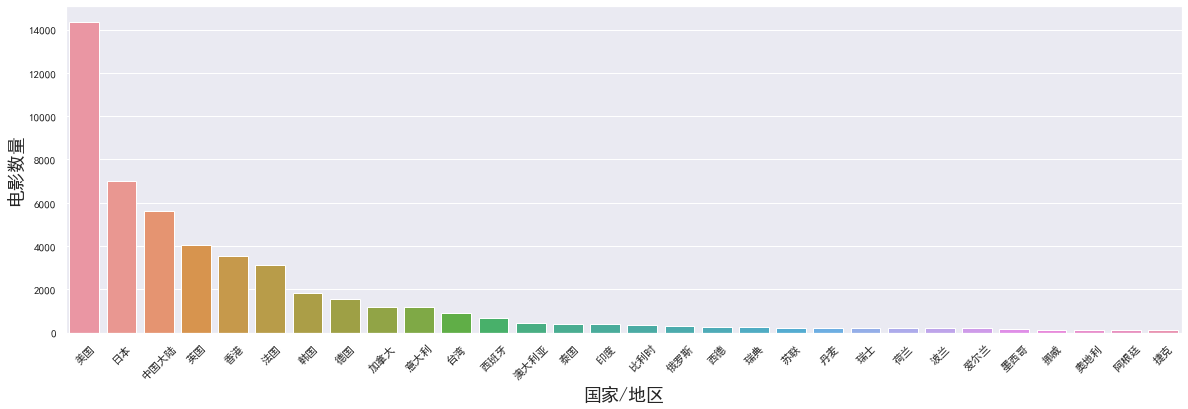

In [45]:
x=all_area_new[:30].index
y=all_area_new[:30]
plt.figure(figsize=(20,6))
ax=sns.barplot(x,y)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# 设置X、Y轴标签的字体大小和字体颜色
ax.set_xlabel('国家/地区',fontsize=18)
ax.set_ylabel('电影数量',fontsize=18,) #  color='r' 

plt.savefig('output1.png',dpi=300,bbox_inches = 'tight')  # dpi分辨率  bbox_inches = 'tight'保存的图片显示得比较完整
plt.show()

各类型电影数量

In [46]:
type_split = df['type'].str.split('/',expand=True)
type_split[:5]

,0,1,2,3,4,5,6,7
0,剧情,喜剧,动作,犯罪,None,None,None,None
1,剧情,爱情,传记,None,None,None,None,None
2,剧情,爱情,None,None,None,None,None,None
3,剧情,动画,None,None,None,None,None,None
4,剧情,战争,None,None,None,None,None,None


In [49]:
all_type = area_split2.apply(pd.value_counts).fillna(0)
all_type.columns = ['area_1','area_2','area_3','area_4','area_5','area_6','area_7','area_8']
all_type = all_type.astype("int")
all_type['Col_sum'] = all_type.apply(lambda x: x.sum(), axis=1)
all_type

,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,Col_sum
Adult,0,7,8,2,0,0,0,0,17
Game-Show,0,2,10,0,0,0,0,0,12
News,0,0,1,1,2,1,0,0,5
Reality-TV,0,17,2,1,0,0,0,0,20
Talk-Show,0,1,0,0,0,0,0,0,1
传记,127,980,518,84,7,1,2,0,1719
傳記 Biography,0,1,0,0,0,0,0,0,1
儿童,17,165,132,51,12,4,0,0,381
冒险,113,623,1630,927,401,147,39,13,3893
剧情,22211,0,0,0,0,0,0,0,22211


In [51]:
all_type = all_type['Col_sum'].sort_values(ascending=False)
all_type[:30]

剧情      22211
喜剧      10035
爱情       8306
动作       7051
惊悚       6566
犯罪       6077
动画       5198
悬疑       4850
冒险       3893
恐怖       3839
奇幻       3565
科幻       3411
历史       2206
战争       2171
家庭       1936
传记       1719
音乐       1661
纪录片      1258
古装       1255
同性       1154
歌舞        906
短片        646
武侠        624
情色        551
运动        492
西部        421
儿童        381
真人秀       236
黑色电影      199
灾难        188
Name: Col_sum, dtype: int64

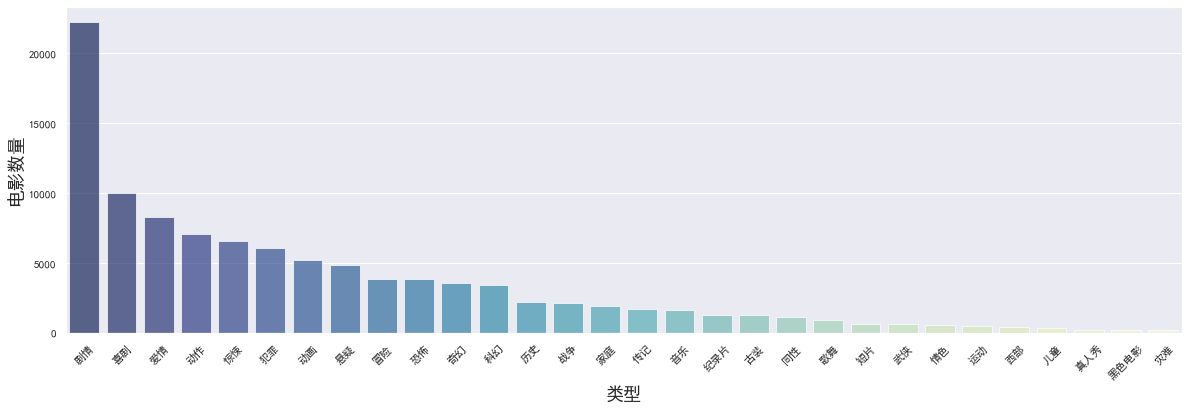

In [52]:
x=all_type[:30].index
y=all_type[:30]

plt.figure(figsize=(20,6))
ax=sns.barplot(x,y,
               alpha=0.7,
               palette=sns.color_palette("YlGnBu_r",30),
#                palette=sns.color_palette("hls",30)
#                palette=sns.color_palette("hls")
#                palette=sns.color_palette()
              )

# ax.tick_params(axis='x',labelsize=12, colors='c') # x轴刻度的 大小 颜色
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # 旋转x轴刻度上文字的 方向
ax.set_xlabel('类型',fontsize=18)
ax.set_ylabel('电影数量',fontsize=18) # 可以设置颜色  color='g'

plt.savefig('output2.png',dpi=300,bbox_inches = 'tight') 
plt.show()

In [53]:
data_Date=df['Date'].value_counts()
data_Date=data_Date.sort_index()
data_Date

1895       1
1900       1
1904       1
1907       1
1911       1
1912       2
1913       3
1914       2
1915       5
1916       9
1917       5
1918       6
1919      12
1920      11
1921      17
1922      13
1923      10
1924      13
1925      21
1926      15
1927      22
1928      22
1929      26
1930      19
1931      33
1932      39
1933      31
1934      37
1935      43
1936      42
        ... 
1990     445
1991     463
1992     483
1993     508
1994     566
1995     567
1996     588
1997     611
1998     661
1999     742
2000     638
2001     661
2002     718
2003     770
2004     898
2005    1022
2006    1179
2007    1313
2008    1335
2009    1452
2010    1316
2011    1582
2012    1608
2013    1691
2014    1765
2015    2174
2016    2405
2017    2347
2018    2375
2019     935
Name: Date, Length: 113, dtype: int64

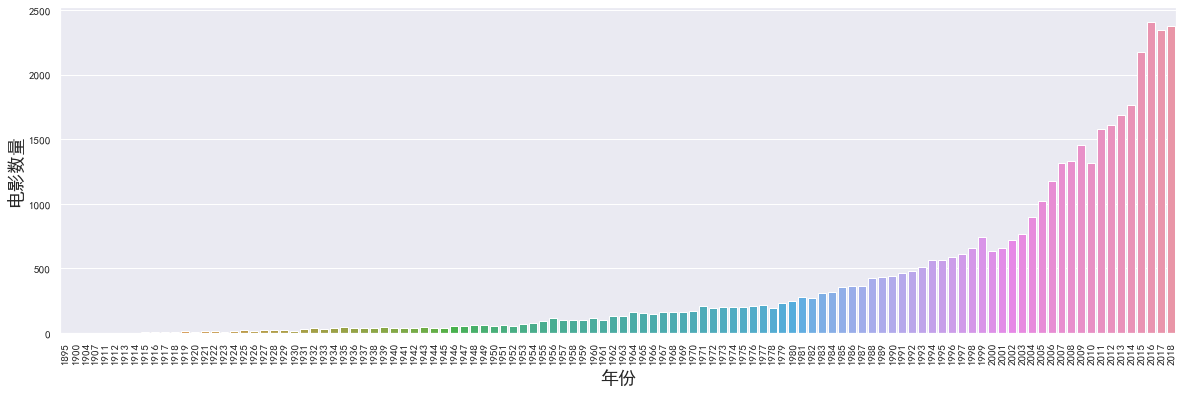

In [57]:
x=data_Date[:-1].index
y=data_Date[:-1].values

plt.figure(figsize=(20,6))
ax=sns.barplot(x,y)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('年份',fontsize=18)
ax.set_ylabel('电影数量',fontsize=18)

plt.savefig('output3.png',dpi=300,bbox_inches = 'tight') 
plt.show()

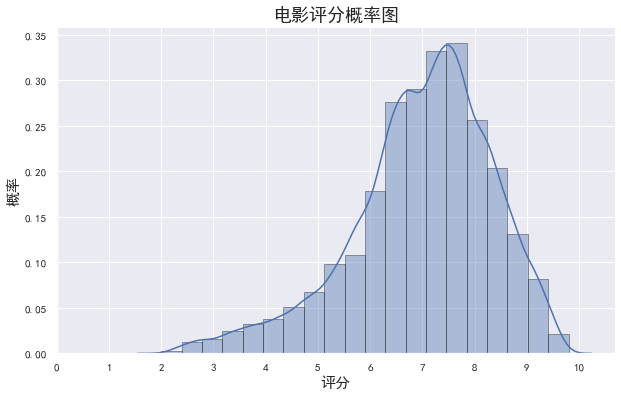

In [59]:
plt.figure(figsize=(10,6))
ax=sns.distplot(df['rate'],bins=20,hist=True,kde=True,
                hist_kws=dict(edgecolor='k')
#                 axlabel='平均评分'
               )

ax.set_xticks(np.arange(0, 11))
ax.set_title('电影评分概率图',fontsize=18)
ax.set_xlabel('评分',fontsize=15)
ax.set_ylabel('概率',fontsize=15)

plt.savefig('output4.png',dpi=300,bbox_inches = 'tight') 
plt.show()

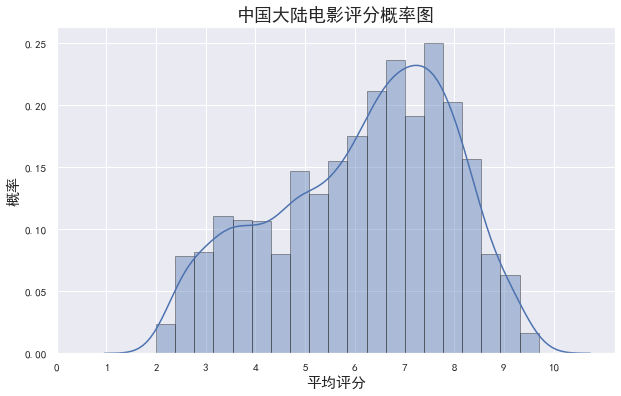

In [60]:
data1=df[df['region']=='中国大陆']['rate']

plt.figure(figsize=(10,6))
ax=sns.distplot(data1,bins=20,hist=True,kde=True,
                hist_kws=dict(edgecolor='k'))
 
ax.set_xticks(np.arange(0, 11))
ax.set_title('中国大陆电影评分概率图',fontsize=18)
ax.set_xlabel('平均评分',fontsize=15)
ax.set_ylabel('概率',fontsize=15)

plt.savefig('output5.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [61]:
data_Date_rate=pd.pivot_table(df,index=['Date'],values='rate')
data_Date_rate['rate']

Date
1895    8.800000
1900    6.300000
1904    8.600000
1907    7.100000
1911    8.200000
1912    7.900000
1913    7.300000
1914    8.200000
1915    7.860000
1916    7.811111
1917    7.880000
1918    7.716667
1919    7.650000
1920    7.163636
1921    7.805882
1922    7.915385
1923    7.800000
1924    8.307692
1925    7.904762
1926    7.706667
1927    7.722727
1928    7.972727
1929    7.488462
1930    7.363158
1931    7.418182
1932    7.194872
1933    7.348387
1934    7.408108
1935    7.530233
1936    7.580952
          ...   
1990    7.320674
1991    7.297192
1992    7.317184
1993    7.356496
1994    7.392756
1995    7.480600
1996    7.456633
1997    7.539935
1998    7.450076
1999    7.450270
2000    7.339655
2001    7.265053
2002    7.263370
2003    7.248052
2004    7.244098
2005    7.260274
2006    7.097540
2007    7.080807
2008    6.953408
2009    6.947934
2010    6.856763
2011    6.768268
2012    6.675373
2013    6.640686
2014    6.563059
2015    6.580957
2016    6.453389
2017    6

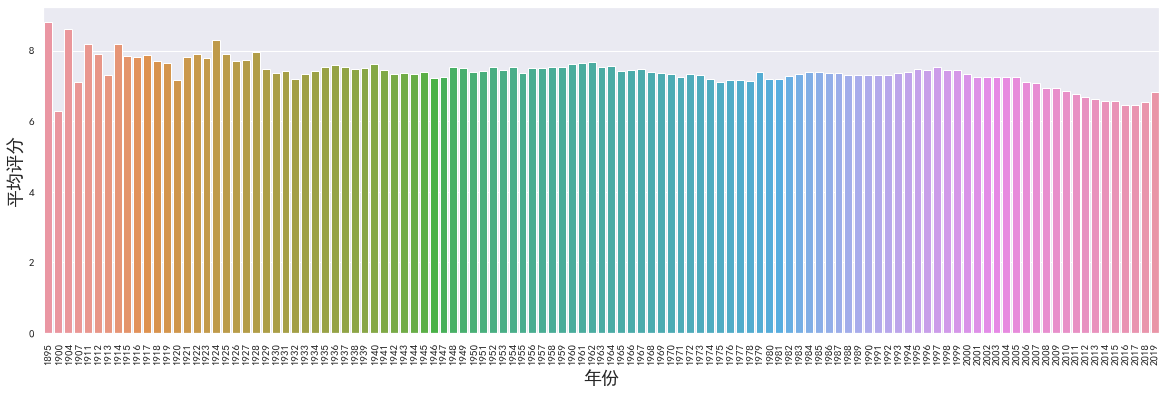

In [62]:
x=data_Date_rate['rate'].index
y=data_Date_rate['rate'].values

plt.figure(figsize=(20,6))
ax=sns.barplot(x,y)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('年份',fontsize=18)
ax.set_ylabel('平均评分',fontsize=18)

plt.savefig('output6.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [63]:
all_area_new[:15].index
# 取电影数量产出的  前15名国家或地区

Index(['美国', '日本', '中国大陆', '英国', '香港', '法国', '韩国', '德国', '加拿大', '意大利', '台湾',
       '西班牙', '澳大利亚', '泰国', '印度'],
      dtype='object')

In [64]:
df_1=df[(df.region=='美国')|(df.region=='中国大陆')|(df.region=='日本')|(df.region=='英国')|(df.region=='香港')|(df.region=='法国')|(df.region=='韩国')|(df.region=='德国')|(df.region=='加拿大')|(df.region=='意大利')|(df.region=='台湾')|(df.region=='西班牙')|(df.region=='澳大利亚')|(df.region=='泰国')|(df.region=='印度')]
df_1
data_region_rate=pd.pivot_table(df_1,index=['region'],values='rate')
data_region_rate=data_region_rate['rate'].sort_values()
data_region_rate

region
中国大陆    6.143814
加拿大     6.601174
香港      6.689141
泰国      6.709456
韩国      6.724528
澳大利亚    6.743137
意大利     6.925000
西班牙     6.954745
印度      7.015060
台湾      7.051897
美国      7.067770
德国      7.149670
法国      7.233767
日本      7.353319
英国      7.664458
Name: rate, dtype: float64

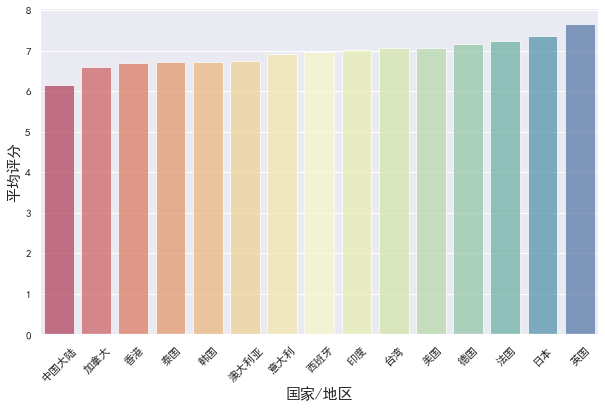

In [65]:
x=data_region_rate.index
y=data_region_rate.values

plt.figure(figsize=(10,6))
ax=sns.barplot(x,y,palette=sns.color_palette("Spectral",15),alpha=0.7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('国家/地区',fontsize=15)
ax.set_ylabel('平均评分',fontsize=15)

plt.savefig('output7.png',dpi=300,bbox_inches = 'tight')
plt.show()

低分排名

In [66]:
df.sort_values(by='rate',axis=0,ascending=True)

,Date,rate,rating_num,region,runtime,title,type
27441,2017,2.0,236,中国大陆,78,真假森林王,喜剧/动画/儿童
20629,2009,2.1,96,美国/阿根廷,86,古老国度的传说 Tales of the Ancient Empire,动作/冒险
19119,2017,2.1,517,中国大陆,90,怨灵宿舍之人偶老师,惊悚/恐怖
24730,2009,2.1,6380,中国大陆,88,嫁给大山的女人,剧情
33507,2017,2.1,861,中国大陆,95,娘子军传奇,剧情/战争
1406,2012,2.1,89,美国,130,异形降临 Alien Dawn,科幻
34998,2017,2.1,700,中国大陆,82,女娲日记,剧情/奇幻
2285,2017,2.2,659,中国大陆,87,怨灵宿舍之白纸女生,惊悚
5355,2018,2.2,658,中国大陆,90,恐怖浴室,惊悚/恐怖
11365,2016,2.2,193,中国大陆,102,蹴鞠,动作/爱情/运动


In [67]:
df3=df.copy()
# 评分等级
df3['Grading']=pd.cut(df3['rate'],[0,3,5,7,9,10],labels=['E','D','C','B','A'])
# 热门程度
bins=np.percentile(df3['rating_num'],[0,20,40,60,80,100])
df3['Popularity']=pd.cut(df3['rating_num'],bins,labels=['E','D','C','B','A'])


In [68]:

df3[(df3['Popularity']=='A')&(df3['Grading']=='E')]

,Date,rate,rating_num,region,runtime,title,type,Grading,Popularity
890,2017,2.2,82005,中国大陆,98,纯洁心灵·逐梦演艺圈,剧情/喜剧,E,A
953,2019,2.8,9584,中国大陆,45,重耳传奇,剧情/传记/历史,E,A
2829,2017,2.9,13296,中国大陆,91,降魔传,喜剧/奇幻,E,A
2993,2018,2.5,28204,中国大陆,42,娘道,剧情,E,A
4550,2018,2.6,10055,中国大陆,45,新笑傲江湖,剧情/武侠/古装,E,A
6168,2017,3.0,18497,中国大陆,40,鬼吹灯之牧野诡事,动作/悬疑/惊悚/奇幻/冒险,E,A
7534,2016,2.9,49285,香港/中国大陆,109,封神传奇,剧情/动作/奇幻,E,A
9798,2017,2.9,116986,中国大陆,43,漂亮的李慧珍,喜剧/爱情,E,A
9941,2019,2.8,18934,台湾/中国大陆,99,下一任：前任,爱情,E,A
11157,2013,2.9,96927,中国大陆,122,天机·富春山居图,动作/冒险,E,A


In [69]:
df3[(df3['Popularity']=='E')&(df3['Grading']=='A')]

,Date,rate,rating_num,region,runtime,title,type,Grading,Popularity
391,1998,9.3,128,美国,30,变形金刚：超能勇士 第三季 Beast Wars: Transformers Season 3,动画,A,E
540,2018,9.2,94,美国,24,战神金刚：传奇的保护神 第六季 Voltron: Legendary Defender Se...,科幻/动画,A,E
840,1983,9.5,137,印度,145,Abhilasha,惊悚,A,E
1046,2011,9.1,59,英国,44,最棒的同伴 Doctor Who: Best of The Companions,科幻/纪录片/短片,A,E
1168,1999,9.5,86,美国,60,法律与秩序 第十季 Law & Order Season 10,剧情/悬疑/犯罪,A,E
1331,1997,9.3,125,美国,45,法律与秩序 第八季 Law & Order Season 8,剧情/悬疑/犯罪,A,E
1333,1998,9.4,59,美国,60,"""The X Files"" SE 6.8 How the Ghosts Stole Chri...",剧情/科幻/悬疑/惊悚,A,E
1334,1999,9.3,81,美国,60,"""The X Files"" SE 6.15 Monday",剧情/科幻/悬疑/惊悚,A,E
1335,1998,9.4,91,美国,45,法律与秩序 第九季 Law & Order Season 9,剧情/悬疑/犯罪,A,E
1460,2012,9.1,99,美国,23,如此美好的一天(短片) It's Such a Beautiful Day,喜剧/科幻/动画/短片/音乐/奇幻,A,E
